<a href="https://colab.research.google.com/github/seoljincheol/Machine-Learning/blob/main/%ED%98%BC%EC%9E%90_%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D(9%EC%9E%A5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9. 텍스트를 위한 인공신경망

### 9-1. 순차 데이터와 순환 신경망

* 순차데이터 : 텍스트나 시계열 데이터처럼 순서에 의미가 있는 데이터.(일자별 날씨, 판매실적, 대화, 글 등) 
* **피드포워드 신경망** : 입력 데이터의 흐름이 앞으로만 전달. Convolutional Neural Network(CNN)

* **순환 신경망** : Recurrent Neural Network(RNN). 
>* **타임스텝** : 이전 샘플의 기억을 담고 있음
>* **은닉상태** : 셀Cell의 출력
>* **tanh** : 은닉층의 활성화함수로 -1부터 1의 값. hyperbolic tangent.
>* **시퀀스** : 순환층에서 하나의 샘플 단위. 시퀀스의 길이 = 타임스텝의 길이
>* 시퀀스 길이(타임스텝)와 단어표현의 2차원 배열 -> 순환층을 통과 -> 1차원 배열(순환층의 뉴런 개수에 의해 결정)

### 9-2. RNN으로 IMDB 리뷰 분류하기

In [ ]:
# corpus: 훈련데이터. 말뭉치
# token: 분리된 단어. 1개의 토큰이 하나의 타임스탬프

from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500) # 자주 등장하는 단어 500개
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(25000,) (25000,) (25000,) (25000,)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
print(len(train_input[0]))
print(len(train_input[1]))

218
189


In [ ]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
print(train_target[:20]) # 부정(0), 긍정(1)

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [ ]:
# 검증을 위해 train_set을 다시 train(80%), val(20%) set으로 분할
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths)) # 리뷰 길이의 평균값, 중간값

239.00925 178.0


In [ ]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)  # length = 100 / 미달시 0으로 패딩, 초과시 앞부분 잘라냄
val_seq = pad_sequences(val_input, maxlen=100)
print(train_seq.shape, val_seq.shape)

(20000, 100)


In [ ]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [ ]:
print(train_input[0][-10:])
# 뒷부분 일치 > 앞부분 삭제됨, 뒤에 중요 정보가 많다고 판단
# pad_sequences() 함수에서 truncating=post로 변경시 뒷부분 삭제.

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [ ]:
print(train_seq[5])
# pad_sequences() 함수에서 padding=post로 변경시 뒷부분에 패딩(0)

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


RNN(순환신경망) 만들기

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
# 원-핫 인코딩
train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)
print(train_oh.shape)
print(val_oh.shape)

(20000, 100, 500)
(5000, 100, 500)


In [ ]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
print(np.sum(train_oh[0][0]))

1.0


In [ ]:
model.summary()
# 500*8(입력차원*뉴런) + 8*8(은닉상태*뉴런) + 8(절편) = 4072

순환신경망 훈련하기

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) # lr = 0.0001
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
print(train_seq.nbytes, train_oh.nbytes)
# seq => one hot recoding 과정에서 데이터 크기가 엄청 커짐

8000000 4000000000


Word Embedding

In [ ]:
# 500개 단어 사용, 16(임베딩 벡터 크기), 100(샘플의 길이)
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))
model2.summary()
# 500*16 = 8000 (토큰*벡터)
# 16*8 + 8*8 + 8 = 200

In [ ]:
# 워드임베딩은 원핫인코딩과 비교해 성능은 비슷하지만 순환층의 가중치 개수가 작고, 훈련세트 크기도 줄어듦.
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) # lr = 0.0001
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### 9-3. LSTM과 GPU Cell

LSTM (Long Short-Term Memory)

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)  # length = 100 / 미달시 0으로 패딩, 초과시 앞부분 잘라냄
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
print(train_seq.shape)
print(val_seq.shape)
print(train_target.shape)
print(val_target.shape)

(20000, 100)
(5000, 100)
(20000,)
(5000,)


In [ ]:
from tensorflow import keras
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.LSTM(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 47ms/step - loss: 0.6929 - accuracy: 0.5164 - val_loss: 0.6912 - val_accuracy: 0.6034
Epoch 2/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6906 - accuracy: 0.5975 - val_loss: 0.6871 - val_accuracy: 0.6412
Epoch 3/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6850 - accuracy: 0.6325 - val_loss: 0.6752 - val_accuracy: 0.6628
Epoch 4/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6669 - accuracy: 0.6581 - val_loss: 0.6159 - val_accuracy: 0.7188
Epoch 5/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6071 - accuracy: 0.7230 - val_loss: 0.5791 - val_accuracy: 0.7408
Epoch 6/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5789 - accuracy: 0.7431 - val_loss: 0.5616 - val_accuracy: 0.7528
Epoch 7/100
313/313 [==============================] - 14s 46ms/step - loss: 0.5590 - accuracy: 0.7527 - val_loss: 0.5477 - val_ac

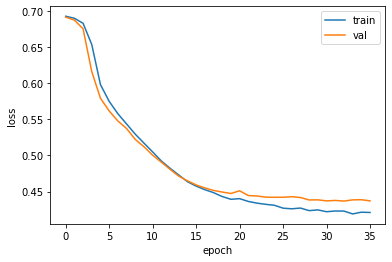

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

Dropout

In [ ]:
from tensorflow import keras
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))
model2.summary()

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 41ms/step - loss: 0.6930 - accuracy: 0.5072 - val_loss: 0.6924 - val_accuracy: 0.5418
Epoch 2/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6914 - accuracy: 0.5586 - val_loss: 0.6902 - val_accuracy: 0.6008
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6888 - accuracy: 0.6110 - val_loss: 0.6859 - val_accuracy: 0.6208
Epoch 4/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6824 - accuracy: 0.6332 - val_loss: 0.6755 - val_accuracy: 0.6268
Epoch 5/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6680 - accuracy: 0.6518 - val_loss: 0.6331 - val_accuracy: 0.6784
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6088 - accuracy: 0.7106 - val_loss: 0.5792 - val_accuracy: 0.7316
Epoch 7/100
313/313 [==============================] - 13s 43ms/step - loss: 0.5707 - accuracy: 0.7387 - val_loss: 0.5571 - val_ac

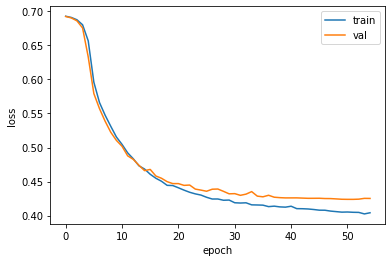

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

2개 층을 연결하기

In [ ]:
from tensorflow import keras
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length = 100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True)) # (None,100,8)
model3.add(keras.layers.LSTM(8, dropout=0.3))        # hidden-state만 출력 (Noen,8)
model3.add(keras.layers.Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 28s 77ms/step - loss: 0.6930 - accuracy: 0.5104 - val_loss: 0.6924 - val_accuracy: 0.5930
Epoch 2/100
313/313 [==============================] - 25s 80ms/step - loss: 0.6920 - accuracy: 0.5797 - val_loss: 0.6893 - val_accuracy: 0.6392
Epoch 3/100
313/313 [==============================] - 25s 80ms/step - loss: 0.6868 - accuracy: 0.6277 - val_loss: 0.6715 - val_accuracy: 0.6672
Epoch 4/100
313/313 [==============================] - 26s 82ms/step - loss: 0.6584 - accuracy: 0.6825 - val_loss: 0.6117 - val_accuracy: 0.7084
Epoch 5/100
313/313 [==============================] - 26s 83ms/step - loss: 0.5991 - accuracy: 0.7173 - val_loss: 0.5827 - val_accuracy: 0.7120
Epoch 6/100
313/313 [==============================] - 26s 84ms/step - loss: 0.5698 - accuracy: 0.7296 - val_loss: 0.5514 - val_accuracy: 0.7430
Epoch 7/100
313/313 [==============================] - 27s 87ms/step - loss: 0.5511 - accuracy: 0.7419 - val_loss: 0.5518 - val_ac

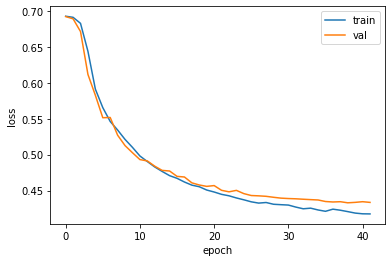

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

GRU (Gated Recurrent Unit)
* hidden-state(은닉상태)와 input(입력)에 weight(가중치)를 곱하고 bias(절편)을 더하는 작은 셀 3개가 있음. 
* 2개는 sigmoid, 1개는 tanh

In [ ]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length = 100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))
model4.summary()
'''
# 입력에 곱하는 가중치 : 16*8 = 128
# 은닉상태에 곱하는 가중치: 8*8 = 64
# 절편은 뉴런마다 있음: 8
# (128+64+8) * 3(작은 셀) = 600
# 작은 셀마다 절편 추가: 뉴런*작은셀 = 8*3 = 24
# 총 모델 파라미터 개수: 600 + 24 = 624
'''

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru_1 (GRU)                  (None, 8)                 624       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


'\n# 입력에 곱하는 가중치 : 16*8 = 128\n# 은닉상태에 곱하는 가중치: 8*8 = 64\n# 절편은 뉴런마다 있음: 8\n# (128+64+8) * 3(작은 셀) = 600\n# 작은 셀마다 절편 추가: 뉴런*작은셀 = 8*3 = 24\n# 총 모델 파라미터 개수: 600 + 24 = 624\n'

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 44ms/step - loss: 0.6927 - accuracy: 0.5155 - val_loss: 0.6917 - val_accuracy: 0.5460
Epoch 2/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6910 - accuracy: 0.5512 - val_loss: 0.6898 - val_accuracy: 0.5660
Epoch 3/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6889 - accuracy: 0.5728 - val_loss: 0.6868 - val_accuracy: 0.5766
Epoch 4/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6851 - accuracy: 0.5867 - val_loss: 0.6825 - val_accuracy: 0.5804
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6789 - accuracy: 0.6048 - val_loss: 0.6756 - val_accuracy: 0.5908
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6702 - accuracy: 0.6233 - val_loss: 0.6653 - val_accuracy: 0.6084
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6582 - accuracy: 0.6329 - val_loss: 0.6498 - val_ac

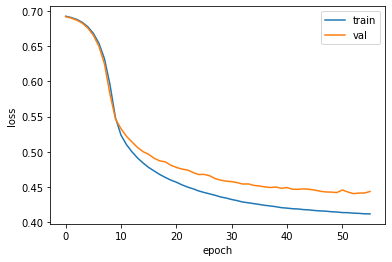

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)